In [6]:
import numpy as np
import ugradio
%matplotlib notebook
import matplotlib.pyplot as plt
import time


In [8]:
def PS(x, divisor):
    """Takes in a complex array and outputs a plot of frequency versus power spectrum."""

    Vsamp = 62.5/divisor
    N = 16000
    
    a = x[:len(x)/2]
    b = x[len(x)/2:]
    c = a + b * 1j

    time = np.linspace(-N/(2*Vsamp),(N/2-1)/Vsamp,N)
    
    f,fx = ugradio.dft.dft(c[:N],t=time, vsamp=Vsamp)
    P = np.abs(fx)**2
    plt.plot(f,P)
    plt.xlabel("Frequency")
    plt.ylabel("Power [volt-second^2]")
    plt.show()
    
    return P

hpm = ugradio.hp_multi.HP_Multimeter()
hpm.start_recording(1,tries = 11)
time.sleep(12) ## locally wait for 120 seconds (have to exceed the total processing time)
hpm.end_recording()
#pm.get_recording_status()
data, times = hpm.get_recording_data()
np.savez("moon Data_temp.npz",volts = data, unitimes = times)
#print data

np.savez("Sun Data_Mar14.npz",volts = data, unitimes = times)
# data taken around 10.30am

In [4]:
npz = np.load("Sun Data_Mar14.npz")
print npz["volts"]
len(npz["volts"])

[  1.34000000e-04   3.10000000e-04   4.81000000e-04 ...,  -2.00000000e-05
  -1.50000000e-05  -1.00000000e-06]


1201

npz = np.load("Sun Data_Mar10.npz")
print npz["volts"]

# local fringe frequency
Bew = 20 #m
lbda = 2.5 #cm

ff = [Bew/lbda * cos(delta)]

<IPython.core.display.Javascript object>


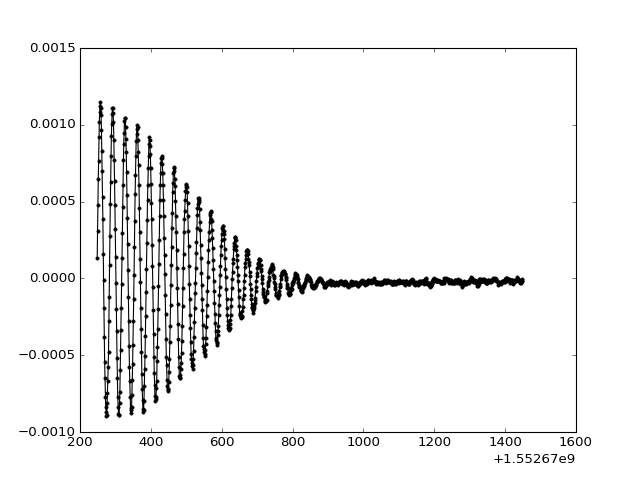

In [7]:
npz = np.load("Sun Data_Mar14.npz")
plt.plot(npz["unitimes"],npz['volts'],'k.-')
plt.show()

In [10]:
print(npz['unitimes'])

[  1.55267025e+09   1.55267025e+09   1.55267025e+09 ...,   1.55267145e+09
   1.55267145e+09   1.55267145e+09]
